# **1. Import Library**
Pada tahap ini,kita perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('clustered.csv')
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Spending,Accept_Offer,Num_Purchase,Enrolled_Days,Children,Cluster
0,Bachelor,Single,58138.0,58,635,88,546,172,88,88,...,3,11,1,67,1617,1,25,663,0,2
1,Bachelor,Single,46344.0,38,11,1,6,2,1,6,...,3,11,0,70,27,0,6,113,2,1
2,Bachelor,Relationship,71613.0,26,426,49,127,111,21,42,...,3,11,0,59,776,0,21,312,0,2
3,Bachelor,Relationship,26646.0,26,11,4,20,10,3,5,...,3,11,0,40,53,0,8,139,1,1
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,3,11,0,43,422,0,19,161,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Recency              2205 non-null   int64  
 4   MntWines             2205 non-null   int64  
 5   MntFruits            2205 non-null   int64  
 6   MntMeatProducts      2205 non-null   int64  
 7   MntFishProducts      2205 non-null   int64  
 8   MntSweetProducts     2205 non-null   int64  
 9   MntGoldProds         2205 non-null   int64  
 10  NumDealsPurchases    2205 non-null   int64  
 11  NumWebPurchases      2205 non-null   int64  
 12  NumCatalogPurchases  2205 non-null   int64  
 13  NumStorePurchases    2205 non-null   int64  
 14  Web_Visit            2205 non-null   int64  
 15  AcceptedCmp3         2205 non-null   i

In [4]:
category_features = df.select_dtypes(include=['object']).columns

df[category_features]

,Education,Marital_Status
0,Bachelor,Single
1,Bachelor,Single
2,Bachelor,Relationship
3,Bachelor,Relationship
4,PhD,Married
...,...,...
2200,Bachelor,Married
2201,PhD,Relationship
2202,Bachelor,Divorced
2203,Master,Relationship


In [5]:
df_encoded = pd.get_dummies(df, columns=category_features)
df_encoded

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Cluster,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Relationship,Marital_Status_Single,Marital_Status_Widow
0,58138.0,58,635,88,546,172,88,88,3,8,...,2,True,False,False,False,False,False,False,True,False
1,46344.0,38,11,1,6,2,1,6,2,1,...,1,True,False,False,False,False,False,False,True,False
2,71613.0,26,426,49,127,111,21,42,1,8,...,2,True,False,False,False,False,False,True,False,False
3,26646.0,26,11,4,20,10,3,5,2,2,...,1,True,False,False,False,False,False,True,False,False
4,58293.0,94,173,43,118,46,27,15,5,5,...,2,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,46,709,43,182,42,118,247,2,9,...,2,True,False,False,False,False,True,False,False,False
2201,64014.0,56,406,0,30,0,0,8,7,8,...,2,False,False,False,True,False,False,True,False,False
2202,56981.0,91,908,48,217,32,12,24,1,2,...,2,True,False,False,False,True,False,False,False,False
2203,69245.0,8,428,30,214,80,30,61,2,6,...,2,False,False,True,False,False,False,True,False,False


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
X = df_encoded.drop(columns=['Cluster'])
y = df_encoded['Cluster'] - 1

numeric_features = X.select_dtypes(include=["number"]).columns

scaler = StandardScaler()
X_scaled = X
X_scaled[numeric_features] = scaler.fit_transform(X_scaled[numeric_features])
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
y

Training set shape: X_train=(1323, 37), y_train=(1323,)
Test set shape: X_test=(882, 37), y_test=(882,)


0       1
1       0
2       1
3       0
4       1
       ..
2200    1
2201    1
2202    1
2203    1
2204    0
Name: Cluster, Length: 2205, dtype: int64

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

## **a. Membangun Model Klasifikasi**

In [7]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


## **b. Evaluasi Model Klasifikasi**

==== Decision Tree Classifier ====
Confusion Matrix:
[[475   9   0]
 [ 19 314   1]
 [  1   5  58]]
Accuracy: 0.9603

----------------------------------------



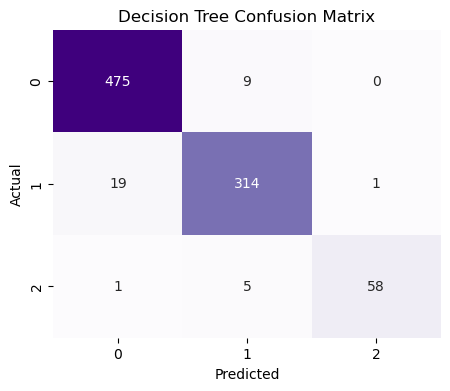

In [9]:
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Decision Tree Classifier ====
Confusion Matrix:
[[469  12   3]
 [ 18 257  59]
 [  0   0  64]]
Accuracy: 0.8957

----------------------------------------



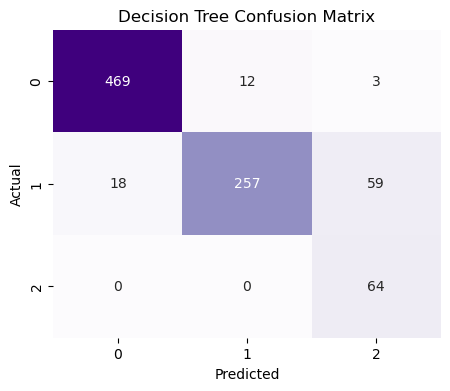

In [10]:
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_nb)

print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Fungsi untuk mengevaluasi model dan mengembalikan hasil dalam bentuk dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Memprediksi hasil menggunakan model yang diberikan
    cm = confusion_matrix(y_test, y_pred)  # Menghitung confusion matrix
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),  # Menghitung akurasi model
        'Precision': precision_score(y_test, y_pred, average='weighted'),  # Mengukur presisi
        'Recall': recall_score(y_test, y_pred, average='weighted'),  # Mengukur recall
        'F1-Score': f1_score(y_test, y_pred, average='weighted')  # Menghitung F1-score
    }
    return results  # Mengembalikan hasil evaluasi dalam dictionary

# Melakukan evaluasi pada masing-masing model dan menyimpan hasilnya
results = {
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Membuat DataFrame untuk merangkum hasil evaluasi
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mengisi DataFrame dengan hasil evaluasi dari setiap model
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],  # Menyimpan nilai akurasi
        'Precision': metrics['Precision'],  # Menyimpan nilai presisi
        'Recall': metrics['Recall'],  # Menyimpan nilai recall
        'F1-Score': metrics['F1-Score']  # Menyimpan nilai F1-score
    })

# Mengonversi daftar dictionary ke dalam bentuk DataFrame
summary_df = pd.DataFrame(rows)

# Menampilkan ringkasan hasil evaluasi
print(summary_df)


                Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree (DT)  0.960317   0.960435  0.960317  0.960166
1    Naive Bayes (NB)  0.895692   0.927119  0.895692  0.901780


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Model Decision Tree menunjukkan performa yang sangat memuaskan dengan mencapai F1-Score sebesar 96%. Hal ini mengindikasikan bahwa model tersebut cukup efektif dan layak digunakan untuk keperluan klasifikasi.

2. Model Naive Bayes memberikan hasil yang sedikit lebih rendah dibandingkan dengan Decision Tree, dengan F1-Score sebesar 90%. Meskipun demikian, performanya masih tergolong baik.

3. Rekomendasi: Untuk meningkatkan kualitas analisis, disarankan untuk menambah volume data serta melakukan segmentasi pelanggan yang lebih variatif. Hal ini akan memberikan insight bisnis yang lebih mendetail dan akurat.